In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
from scipy.stats import linregress

In [3]:
BTC = yf.download('BTC-USD', start='2023-01-15', end='2023-01-16',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [4]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-15 00:00:00+00:00,20977.484375,20977.484375,20977.484375,20977.484375,20977.484375,0
2023-01-15 00:01:00+00:00,20971.250000,20971.250000,20971.250000,20971.250000,20971.250000,0
2023-01-15 00:02:00+00:00,20974.003906,20974.003906,20974.003906,20974.003906,20974.003906,0
2023-01-15 00:03:00+00:00,20985.720703,20985.720703,20985.720703,20985.720703,20985.720703,0
2023-01-15 00:04:00+00:00,20982.445312,20982.445312,20982.445312,20982.445312,20982.445312,0
...,...,...,...,...,...,...
2023-01-15 23:55:00+00:00,20872.593750,20872.593750,20872.593750,20872.593750,20872.593750,0
2023-01-15 23:56:00+00:00,20871.925781,20871.925781,20871.925781,20871.925781,20871.925781,0
2023-01-15 23:57:00+00:00,20874.332031,20874.332031,20874.332031,20874.332031,20874.332031,0


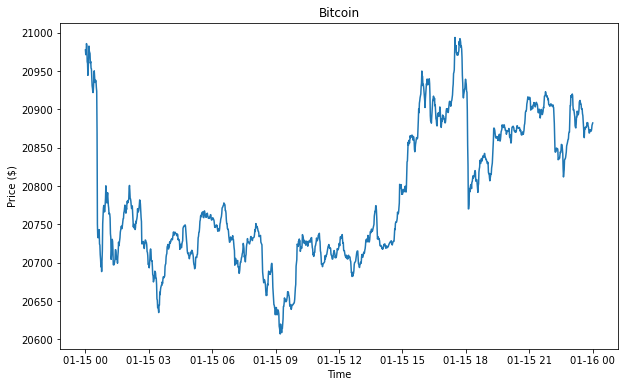

In [5]:
fig = plt.figure(figsize=(10, 6))
plt.plot(BTC['Close'])
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Bitcoin');

In [6]:
BTC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1.435000e+03
mean,20785.565723,20785.565723,20785.565723,20785.565723,20785.565723,1.209482e+07
std,89.255553,89.255553,89.255553,89.255553,89.255553,4.686215e+07
min,20606.986328,20606.986328,20606.986328,20606.986328,20606.986328,0.000000e+00
25%,20718.388672,20718.388672,20718.388672,20718.388672,20718.388672,0.000000e+00
50%,20754.820312,20754.820312,20754.820312,20754.820312,20754.820312,0.000000e+00
75%,20872.062500,20872.062500,20872.062500,20872.062500,20872.062500,3.430400e+05
max,20993.748047,20993.748047,20993.748047,20993.748047,20993.748047,4.919931e+08


In [7]:
ETH = yf.download('ETH-USD', start='2023-01-15', end='2023-01-16',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


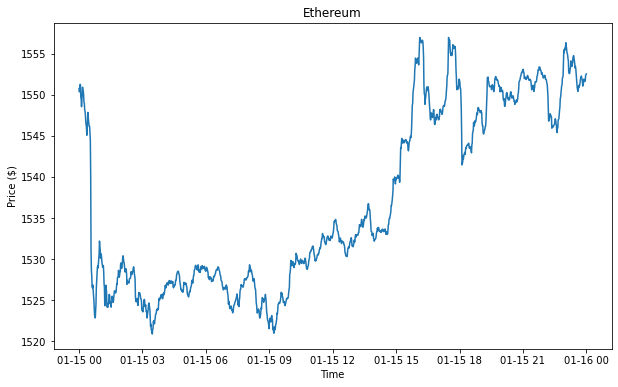

In [8]:
fig = plt.figure(figsize=(10, 6))
plt.plot(ETH['Close'])
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Ethereum');

In [9]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-15 00:00:00+00:00,1550.731567,1550.731567,1550.731567,1550.731567,1550.731567,0
2023-01-15 00:01:00+00:00,1550.339844,1550.339844,1550.339844,1550.339844,1550.339844,0
2023-01-15 00:02:00+00:00,1550.635986,1550.635986,1550.635986,1550.635986,1550.635986,0
2023-01-15 00:03:00+00:00,1551.246338,1551.246338,1551.246338,1551.246338,1551.246338,1290240
2023-01-15 00:04:00+00:00,1551.168823,1551.168823,1551.168823,1551.168823,1551.168823,0
...,...,...,...,...,...,...
2023-01-15 23:55:00+00:00,1551.602539,1551.602539,1551.602539,1551.602539,1551.602539,0
2023-01-15 23:56:00+00:00,1551.607056,1551.607056,1551.607056,1551.607056,1551.607056,0
2023-01-15 23:57:00+00:00,1551.740723,1551.740723,1551.740723,1551.740723,1551.740723,19456


In [10]:
ETH.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1.435000e+03
mean,1536.849532,1536.849532,1536.849532,1536.849532,1536.849532,9.779275e+05
std,11.022331,11.022331,11.022331,11.022331,11.022331,3.249894e+06
min,1520.893799,1520.893799,1520.893799,1520.893799,1520.893799,0.000000e+00
25%,1527.187622,1527.187622,1527.187622,1527.187622,1527.187622,0.000000e+00
50%,1532.549927,1532.549927,1532.549927,1532.549927,1532.549927,0.000000e+00
75%,1548.640320,1548.640320,1548.640320,1548.640320,1548.640320,2.106880e+05
max,1556.950806,1556.950806,1556.950806,1556.950806,1556.950806,5.018266e+07


In [11]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [12]:
S1_0

20977.484375

In [13]:
S2_0

1550.7315673828125

In [14]:
correlation = BTC['Close'].corr(ETH['Close'])
correlation

0.9382287413466662

In [15]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
#result = linregress(BTC.values[:, 0], ETH.values[:, 0])
beta = result.slope
result

LinregressResult(slope=1.5661712207376555, intercept=-8.233417715201252, rvalue=0.9380928722172794, pvalue=0.0, stderr=0.015276642929370901, intercept_stderr=0.15188047247240588)

In [21]:
#Augmented Dickey-Fuller Test
residuals=BTC['Adj Close']-beta*ETH['Adj Close']
#residuals=BTC.values[:, 0]-result.slope*BTC.values[:, 0]
adf = ts.adfuller(residuals)
adf

(-2.978499786525154,
 0.03695161913444947,
 3,
 1431,
 {'1%': -3.4349279657922653,
  '5%': -2.863561857668172,
  '10%': -2.567846424153014},
 8909.966397787499)

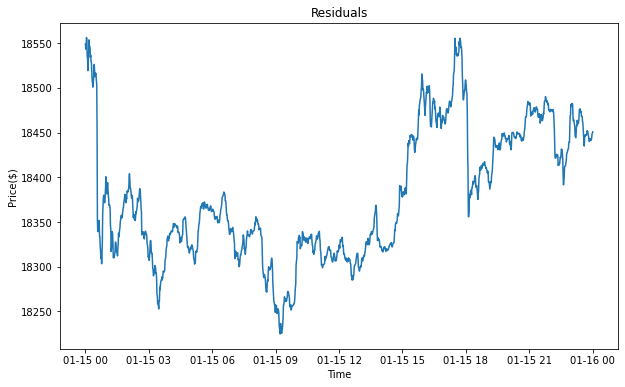

In [24]:
fig = plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.title('Residuals');

In [15]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1435
mu_2 = lr2.mean() * 1435
sigma_1 = lr1.std() * np.sqrt(1435)
sigma_2 = lr2.std() * np.sqrt(1435)
rho = lr1.corr(lr2)
z_0 = 0.00
beta = 1.77
gamma = 0.5
delta = 1
T = 1
M = len(ETH)
rho

0.9062075815864635

In [16]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [17]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

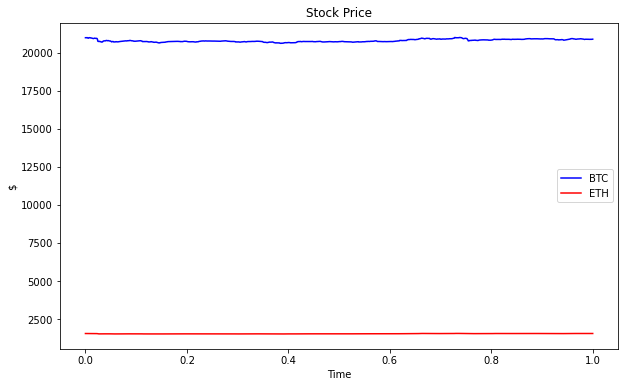

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

In [20]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

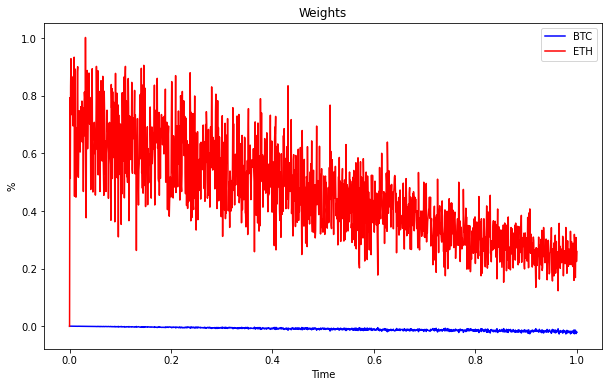

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='BTC')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

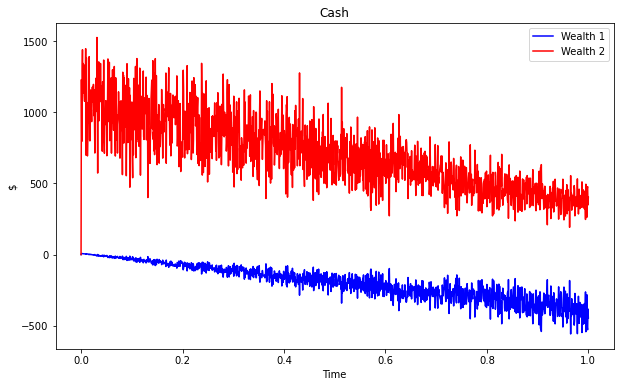

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [23]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

In [24]:
Wealth

array([[   0.        ],
       [1238.09388557],
       [ 803.28775308],
       ...,
       [1006.30191077],
       [ 731.41894322],
       [ 847.30096387]])

Text(0.5, 1.0, 'Wealth')

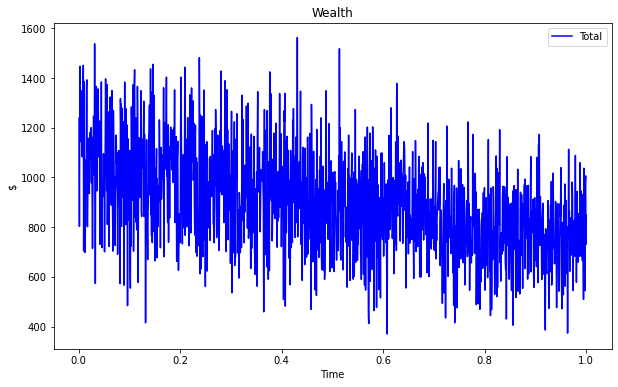

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Text(0.5, 1.0, 'Comparison')

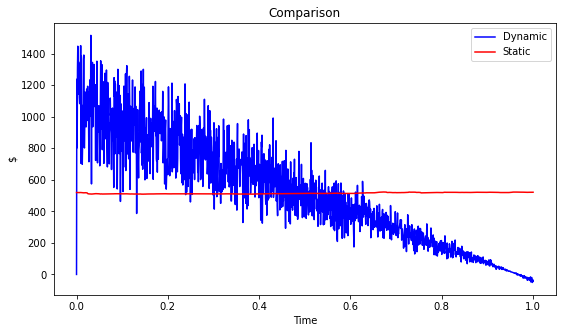

In [26]:
plt.figure(figsize=(9, 5))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [27]:
Pi_1.mean()

-0.009223734413365518

In [28]:
Pi_2.mean()

0.45986313907866677